# WEEK2

# Exercise 1 – Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [15]:
df=pd.read_excel("D:\\230968038- HIMANJALI GANAPA\\DA Lab\\Cereals1.xls")
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
1                    All-Bran   K    C        70        4    1     260    9.0   
2   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
3              Almond_Delight   R    C       110        2    2     200    1.0   
4     Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
71                    Triples   G    C       110        2    1     250    0.0   
72                       Trix   G    C       110        1    1     140    0.0   
73                 Wheat_Chex   R    C       100        3    1     230    3.0   
74                   Wheaties   G    C       100        3    1     200    3.0   
75        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

1) Create a table with the 5-number summary of all the numeric attributes.

In [5]:
df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


2) For each of the numeric attributes (proteins up to vitamins), identify and replace all 
missing data (indicated with -1) with the arithmetic mean of the attribute. 

In [17]:
df['protein'].fillna(-1, inplace=True)
df['fat'].fillna(-1, inplace=True)
df['sodium'].fillna(-1, inplace=True)
df['fiber'].fillna(-1, inplace=True)
df['carbo'].fillna(-1, inplace=True)
df['sugars'].fillna(-1, inplace=True)
df['potass'].fillna(-1, inplace=True)
df['vitamins'].fillna(-1, inplace=True)
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
1                    All-Bran   K    C        70        4    1     260    9.0   
2   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
3              Almond_Delight   R    C       110        2    2     200    1.0   
4     Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
71                    Triples   G    C       110        2    1     250    0.0   
72                       Trix   G    C       110        1    1     140    0.0   
73                 Wheat_Chex   R    C       100        3    1     230    3.0   
74                   Wheaties   G    C       100        3    1     200    3.0   
75        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

3) Create a table with the 5-number summary of all the numeric attributes after treating 
missing values.  Do you think the strategy used in dealing with missing values was 
effective?  

In [18]:
df.replace(-1, np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:  
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [19]:
df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


4) For each of the numeric attributes (proteins up to vitamins), identify and replace all 
noisy data with the median of attribute. 

In [20]:
from scipy import stats

numeric_columns = ['protein', 'fat', 'sodium', 'fiber','carbo','sugars','potass','vitamins'] 
z_scores = np.abs(stats.zscore(df[numeric_columns]))
threshold = 3  
outliers = (z_scores > threshold)
for column in numeric_columns:
    median = df[column].median()
    df.loc[outliers[column], column] = median


In [21]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,1,15,2.00,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1,140,0.00,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1,200,3.00,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


5) Create a table with the 5-number summary of all the numeric attributes after treating 
noisy values.  Do you think the strategy used in dealing with noisy values was 
effective? 

In [22]:
df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.434211,0.960526,160.065789,1.792105,14.933333,7.040000,90.032006,22.368421
std,19.139378,0.924994,0.900974,84.318813,1.520220,3.737498,4.377031,54.891068,7.723284
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.966667,7.000000,90.000000,25.000000
75%,110.000000,3.000000,1.250000,212.500000,3.000000,17.000000,11.000000,111.250000,25.000000
max,160.000000,5.000000,3.000000,320.000000,6.000000,23.000000,15.000000,260.000000,25.000000


# Week 4

# EXERCISE 1: Data Analysis using CEREALS dataset 

1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer 

In [23]:
crosstab_CM= pd.crosstab(df['type'], df['mfr'])
print(crosstab_CM)

mfr   A   G   K  N  P  Q  R
type                       
C     0  22  23  4  9  7  8
H     1   0   0  1  0  1  0


2. Which is the cereal with the best rating, worst rating? 

In [24]:
df_filtered = df[['name', 'rating']]
best_rating_cereal = df_filtered.loc[df_filtered['rating'].idxmax()]
worst_rating_cereal = df_filtered.loc[df_filtered['rating'].idxmin()]
print("Cereal with the best rating:")
print(best_rating_cereal)
print("\nCereal with the worst rating:")
print(worst_rating_cereal)

Cereal with the best rating:
name      All-Bran_with_Extra_Fiber
rating                    93.704912
Name: 2, dtype: object

Cereal with the worst rating:
name      Cap'n'Crunch
rating       18.042851
Name: 9, dtype: object


3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

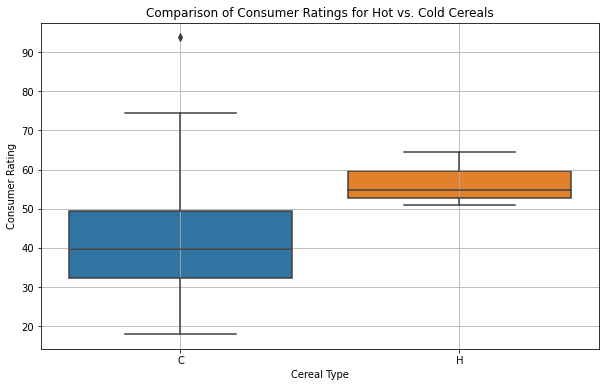

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Comparison of Consumer Ratings for Hot vs. Cold Cereals')
plt.xlabel('Cereal Type')
plt.ylabel('Consumer Rating')
plt.grid(True)
plt.show()

4. Is there a relation between sugars, calories, carbs, and fat? 

In [28]:
correlation_matrix = df[['sugars', 'calories', 'carbo', 'fat']].corr()
print(correlation_matrix)

            sugars  calories     carbo       fat
sugars    1.000000  0.574182 -0.501086  0.325118
calories  0.574182  1.000000  0.207331  0.535144
carbo    -0.501086  0.207331  1.000000 -0.240608
fat       0.325118  0.535144 -0.240608  1.000000


5. Which manufacturers produce cereal with highest calories? 

In [29]:
average_calories = df.groupby('mfr')['calories'].mean()
highest_calories_manufacturer = average_calories.idxmax()
highest_calories_value = average_calories.max()
print(f"The manufacturer with the highest average calories is {highest_calories_manufacturer} with an average of {highest_calories_value:.2f} calories.")

The manufacturer with the highest average calories is R with an average of 115.00 calories.


6. Use correlation tests and visualization to identify if the two variables calories and 
consumer rating associated? 

Pearson correlation coefficient between Calories and Consumer Rating: -0.67


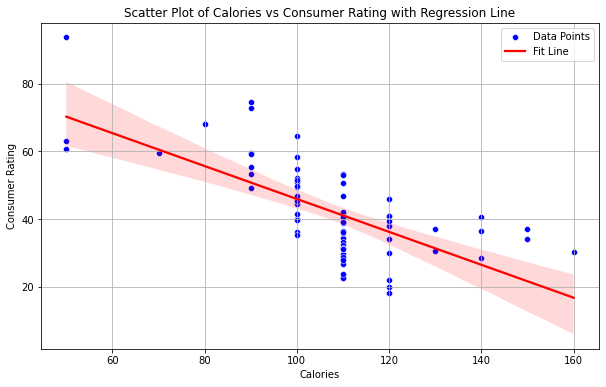

In [30]:
correlation = df[['calories', 'rating']].corr().loc['calories', 'rating']
print(f'Pearson correlation coefficient between Calories and Consumer Rating: {correlation:.2f}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df, color='blue', label='Data Points')
sns.regplot(x='calories', y='rating', data=df, scatter=False, color='red', label='Fit Line')
plt.title('Scatter Plot of Calories vs Consumer Rating with Regression Line')
plt.xlabel('Calories')
plt.ylabel('Consumer Rating')
plt.legend()
plt.grid(True)
plt.show()

7. Use correlation tests and visualization to identify if the two variables shelf and 
consumer rating associated?  

Pearson correlation coefficient between Shelf Life and Consumer Rating: 0.00


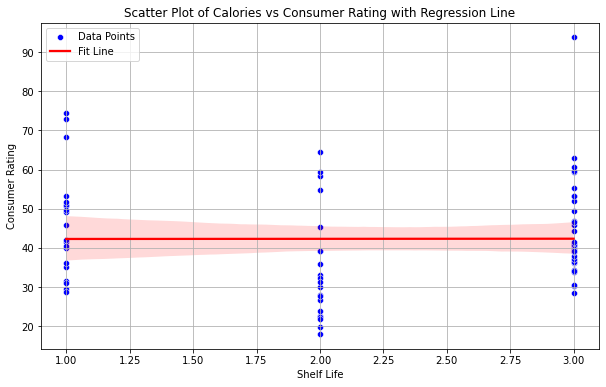

In [32]:
correlation = df[['shelf', 'rating']].corr().loc['shelf', 'rating']
print(f'Pearson correlation coefficient between Shelf Life and Consumer Rating: {correlation:.2f}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shelf', y='rating', data=df, color='blue', label='Data Points')
sns.regplot(x='shelf', y='rating', data=df, scatter=False, color='red', label='Fit Line')
plt.title('Scatter Plot of Calories vs Consumer Rating with Regression Line')
plt.xlabel('Shelf Life')
plt.ylabel('Consumer Rating')
plt.legend()
plt.grid(True)
plt.show()

8. Is there a relation between manufacturer and rating? 

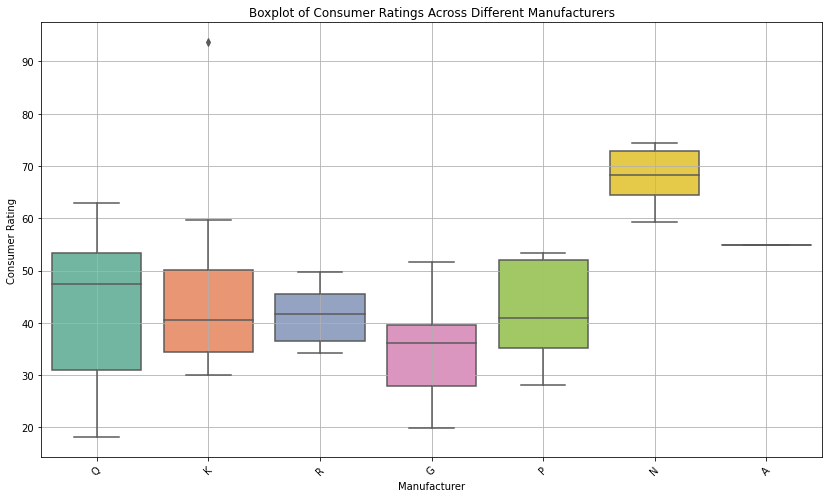

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='mfr', y='rating', data=df, palette='Set2')
plt.title('Boxplot of Consumer Ratings Across Different Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Consumer Rating')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

9. Which nutrients are essential for a good rating for a cereal? 

In [37]:
nutrients = ['sugars', 'calories', 'carbo', 'fat', 'protein', 'fiber','sodium','potass','vitamins']
columns_of_interest = nutrients + ['rating']
correlation_matrix1 = df[columns_of_interest].corr()
correlation_with_rating = correlation_matrix1['rating']
print("Correlation of nutrients with Consumer Rating:")
print(correlation_with_rating)

Correlation of nutrients with Consumer Rating:
sugars     -0.774195
calories   -0.674336
carbo       0.160944
fat        -0.434805
protein     0.463891
fiber       0.335319
sodium     -0.402077
potass      0.162752
vitamins   -0.468432
rating      1.000000
Name: rating, dtype: float64


In [39]:
correlation_with_rating = correlation_matrix1['rating'].drop('rating')
top_3_nutrients = correlation_with_rating.abs().nlargest(3).index.tolist()
print("Top 3 nutrients most strongly related to Consumer Rating:")
print(top_3_nutrients)

Top 3 nutrients most strongly related to Consumer Rating:
['sugars', 'calories', 'vitamins']


10. Design a Linear regression model to predict the rating of a cereal based on top 3 
related nutrients. Tabulate the accuracy of the model using an 80, 20 split.

In [40]:
from sklearn.model_selection import train_test_split
X = df[top_3_nutrients] 
y = df['rating'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Testing set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


Training set: X_train shape = (60, 3), y_train shape = (60,)
Testing set: X_test shape = (16, 3), y_test shape = (16,)


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model coefficients:")
for feature, coef in zip(top_3_nutrients, model.coef_):
    print(f"{feature}: {coef:.4f}")

Model coefficients:
sugars: -1.6197
calories: -0.2625
vitamins: -0.3364


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 5.3557
Mean Squared Error (MSE): 49.2334
R-squared (R²): 0.5432


# Week2

# Exercise 2 – Data Preprocessing and Visualization

In [6]:
dbs=pd.read_csv("D:\\230968038- HIMANJALI GANAPA\\DA Lab\\Bengaluru_House_Prices.csv")
dbs

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


1. Compute the total number of missing values in the DataFrame. 

In [7]:
total_missing = dbs.isnull().sum().sum()
print("Total number of missing values:", total_missing)

Total number of missing values: 6201


2. Compute the percentage of missing values in the DataFrame. If a column has more 
than 15% missing values then drop (or remove) the column from the DataFrame. 

In [8]:
percent_missing = dbs.isnull().sum() * 100 
columns_to_drop = percent_missing[percent_missing > 15].index
df_cleaned = dbs.drop(columns=columns_to_drop)
print("Percentage of missing values in each column:\n", percent_missing)
print("\nDataFrame after dropping columns with more than 15% missing values:\n", df_cleaned)

Percentage of missing values in each column:
 area_type            0
availability         0
location           100
size              1600
society         550200
total_sqft           0
bath              7300
balcony          60900
price                0
dtype: int64

DataFrame after dropping columns with more than 15% missing values:
                   area_type   availability total_sqft   price
0      Super built-up  Area         19-Dec       1056   39.07
1                Plot  Area  Ready To Move       2600  120.00
2            Built-up  Area  Ready To Move       1440   62.00
3      Super built-up  Area  Ready To Move       1521   95.00
4      Super built-up  Area  Ready To Move       1200   51.00
...                     ...            ...        ...     ...
13315        Built-up  Area  Ready To Move       3453  231.00
13316  Super built-up  Area  Ready To Move       3600  400.00
13317        Built-up  Area  Ready To Move       1141   60.00
13318  Super built-up  Area         18-Jun  

3. Which column has the most number of missing values? 

In [9]:
missing_percent = dbs.isnull().mean() * 100
dbs = dbs.loc[:, missing_percent <= 15]
most_missing_column = missing_percent.idxmax()
print("Column with the most number of missing values:", most_missing_column)

Column with the most number of missing values: society


4. drop (or remove) the rows containing the missing values in the location, size, and 
total_sqft columns 

In [10]:
dbs.dropna(subset=['location', 'size', 'total_sqft'])
dbs

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


5. drop all the rows in the bath column containing more than 5 bathrooms. 

In [11]:
dbs = dbs[dbs['bath'] <= 5]
dbs

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


6. Find the houses available in each area. 

In [12]:
house_counts_per_area = dbs['location'].value_counts()
print("Number of Houses Available in Each Area:")
print(house_counts_per_area)

Number of Houses Available in Each Area:
Whitefield                        530
Sarjapur  Road                    384
Electronic City                   301
Kanakpura Road                    262
Thanisandra                       230
                                 ... 
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Dwarka Nagar                        1
Abshot Layout                       1
Name: location, Length: 1260, dtype: int64


7. Find the top five areas where the large number of houses available 

In [13]:
top_5_areas = house_counts_per_area.head(5)
print("Top Five Areas with the Most Number of Houses:")
print(top_5_areas)

Top Five Areas with the Most Number of Houses:
Whitefield         530
Sarjapur  Road     384
Electronic City    301
Kanakpura Road     262
Thanisandra        230
Name: location, dtype: int64


8. Visualize the house price based on build up area of top five locations where the large 
number of houses available (Visualize by independent charts.)

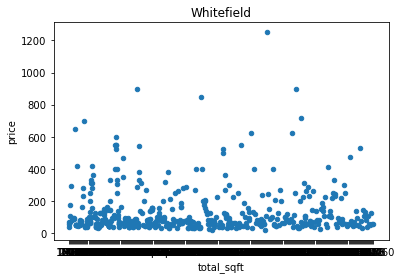

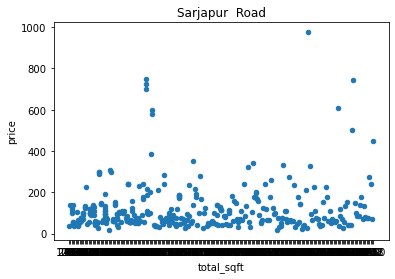

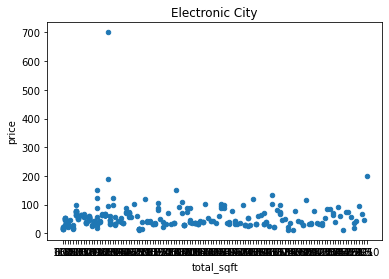

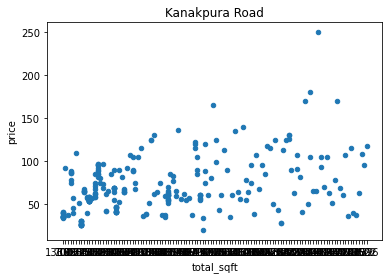

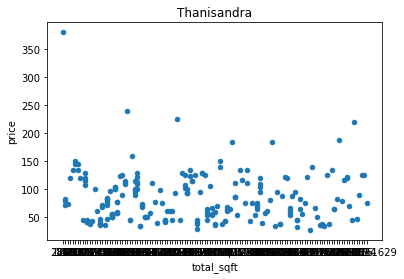

In [18]:
import matplotlib.pyplot as plt
top_locations = dbs['location'].value_counts().head(5).index
top_df = dbs[dbs['location'].isin(top_locations)]
for location in top_locations:
    subset = top_df[top_df['location'] == location]
    subset.plot(kind='scatter', x='total_sqft', y='price', title=location)
    plt.show()